In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from time import strftime
from time import sleep
import os
import json
from typing import Dict, List, Optional, Union, cast
import acquire
from prepare import *
import json

from env import github_username, github_token

# Acquire

In [2]:
data = pd.read_json('data.json')

In [3]:
data.head()

,repo,language,readme_contents
0,thedaviddias/Front-End-Checklist,None,"<h1 align=""center"">\n<br>\n <img src=""https:/..."
1,onevcat/Kingfisher,Swift,"<p align=""center"">\n<img src=""https://raw.gith..."
2,FallibleInc/security-guide-for-developers,None,# 实用性 WEB 开发人员安全须知 \n\n### 目标读者 \n\n安全问题主要由以...
3,tailwindlabs/tailwindcss,JavaScript,"<p>\n <a href=""https://tailwindcss.com/"" ta..."
4,codepath/android_guides,None,# CodePath Android Cliffnotes\n\nWelcome to th...


# Prepare

In [4]:
data.isna().sum()

repo                0
language           54
readme_contents     0
dtype: int64

In [5]:
# removed languages that were 'none'
data = data.dropna()

In [6]:
len(data)

506

In [7]:
data.language.value_counts()

JavaScript          141
Python               59
Java                 46
TypeScript           45
Go                   36
C++                  30
C                    20
Shell                13
Swift                13
HTML                 12
Rust                 11
Kotlin                9
C#                    9
Ruby                  9
Jupyter Notebook      6
Vue                   6
Vim script            6
PHP                   6
CSS                   5
Objective-C           3
Haskell               2
CoffeeScript          2
Elixir                2
Lua                   2
TeX                   2
Crystal               1
Dockerfile            1
Rascal                1
AsciiDoc              1
Clojure               1
Standard ML           1
Emacs Lisp            1
Makefile              1
Batchfile             1
Dart                  1
OCaml                 1
Name: language, dtype: int64

In [8]:
# brought the dataset down to those languages that were more than or equal to 30
data = data[data['language'].map(data['language'].value_counts()) >= 30]

In [9]:
len(data)

357

<AxesSubplot:>

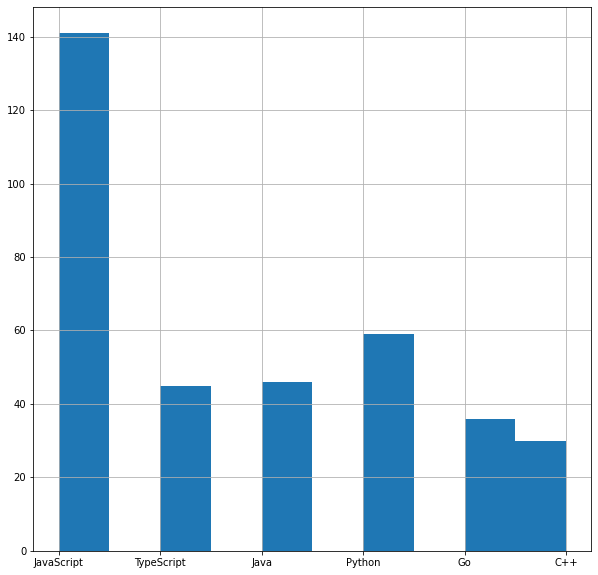

In [10]:
plt.figure(figsize=(10, 10))
data.language.hist(align = 'mid')

In [11]:
data.isna().sum()

repo               0
language           0
readme_contents    0
dtype: int64

In [12]:
def clean_readme(df):
    for content in data.readme_contents: 
        basic_clean(content)
    return content

In [13]:
data = data.reset_index()

In [14]:
data['cleaned_readme'] = data['readme_contents'].apply(lambda string: basic_clean(string))

In [15]:
data

,index,repo,language,readme_contents,cleaned_readme
0,3,tailwindlabs/tailwindcss,JavaScript,"<p>\n <a href=""https://tailwindcss.com/"" ta...",p\n a hrefhttpstailwindcsscom target_blank\...
1,5,github/fetch,JavaScript,# window.fetch polyfill\n\nThe `fetch()` funct...,windowfetch polyfill\n\nthe fetch function is...
2,7,ianstormtaylor/slate,TypeScript,"<p align=""center"">\n <a href=""#""><img src=""./...",p aligncenter\n a hrefimg srcdocsimagesbanner...
3,8,Kong/insomnia,JavaScript,# Insomnia REST Client\n\n[![Slack Channel](ht...,insomnia rest client\n\nslack channelhttpscha...
4,9,CymChad/BaseRecyclerViewAdapterHelper,Java,![](https://user-images.githubusercontent.com/...,httpsuserimagesgithubusercontentcom76982093319...
...,...,...,...,...,...
352,551,TheAlgorithms/Java,Java,# 알고리즘 - 자바\n\n## 이 [개발브런치](https://github.com...,\n\n httpsgithubcomthealgorithmsjavatreede...
353,555,tornadoweb/tornado,Python,Tornado Web Server\n==================\n\n.. i...,tornado web server\n\n\n image httpsbadgesgitt...
354,557,gulpjs/gulp,JavaScript,"<p align=""center"">\n <a href=""https://gulpjs....",p aligncenter\n a hrefhttpsgulpjscom\n img...
355,558,alibaba/weex,C++,# Weex\n\nA framework for building Mobile cros...,weex\n\na framework for building mobile cross...


In [16]:
data = prep_article_data(df = data, column = 'readme_contents', extra_words=[], exclude_words=[])